In [1]:
# ---- IMPORTS ----

import os 
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

In [2]:
# --------------------- HANDLING DIRECTORY -------------------------

# parent folder director
parent_dir = Path.cwd().parent

# data directory
data_dir = parent_dir / "data"

# dataset directory
dataset_dir = data_dir / "Loan_Default.csv"

# Add parent directory to system
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

In [3]:
# importing custom modules

from modules.preprocess import clean_data
from modules.preprocess import preprocessing_pipeline
from modules.preprocess import transform_data
from modules.preprocess import get_transformed_df

In [4]:
# import data into dataframe
df = pd.read_csv(dataset_dir)

## Clean Data and Preprocess with Pipeline

In [5]:
# ------- Clean Data and Preprocess with Pipeline -------
df_clean = clean_data(df)

df_clean.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Region,Security_Type,Status,dtir1,age_numerical
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,to_inst,98.728814,south,direct,1,45.0,29.5
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,to_inst,NaN,North,direct,1,NaN,59.5
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,to_inst,80.019685,south,direct,0,46.0,39.5
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,not_inst,69.376900,North,direct,0,42.0,49.5
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,not_inst,91.886544,North,direct,0,39.0,29.5


In [6]:
# ------ prepprocessing pipeline ------
pipeline = preprocessing_pipeline()

pipeline

Pipeline(steps=[('data_cleaning',
                 FunctionTransformer(func=<function clean_data at 0x000001D829E1B4C0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('log_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['loan_amount',
                                                   'property_value', 'income'...
                                                                                 sparse_output=False))]),
                                                  ['loan_limit', 'Gender',
                                                   'approv_in_adv', 'loan_type',
                                                   'loan_purpose',
                                                   'Credit_Worthiness',
                                                   'open_credit',
                                                   'business_or_commercial',
                                                   'Neg_ammortization',
                                                   'interest_only',
                                                   'lump_sum_payment',
                                                   'construction_type',
                                                   'occupancy_type',
                                                   'Secured_by', 'total_units',
                                                   'credit_type',
                                                   'co-applicant_credit_type',
                                                   'submission_of_application',
                                                   'Region',
                                                   'Security_Type'])]))])

In [7]:
# ---------- SPLIT DATASET -------------
# Prediction Matrix
X = df.drop(columns= "Status")

# Target vector
y = df["Status"]

# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape


(118936, 33)

In [8]:
# ----------- TRANSFORM DATA ----------------

# fit and transform Train set
X_train_trans = pipeline.fit_transform(X_train)

# Transform the test set
X_test_trans = pipeline.transform(X_test)

X_test_trans.shape

type(X_test_trans)

numpy.ndarray

In [9]:
pipeline

Pipeline(steps=[('data_cleaning',
                 FunctionTransformer(func=<function clean_data at 0x000001D829E1B4C0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('log_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['loan_amount',
                                                   'property_value', 'income'...
                                                                                 sparse_output=False))]),
                                                  ['loan_limit', 'Gender',
                                                   'approv_in_adv', 'loan_type',
                                                   'loan_purpose',
                                                   'Credit_Worthiness',
                                                   'open_credit',
                                                   'business_or_commercial',
                                                   'Neg_ammortization',
                                                   'interest_only',
                                                   'lump_sum_payment',
                                                   'construction_type',
                                                   'occupancy_type',
                                                   'Secured_by', 'total_units',
                                                   'credit_type',
                                                   'co-applicant_credit_type',
                                                   'submission_of_application',
                                                   'Region',
                                                   'Security_Type'])]))])

## Create Processed DataFrame Function

In [10]:
# ------- DEFINE FEATURE LISTS -------

# Log Transform Columns
log_transform_cols = [
    'loan_amount',
    'property_value',
    'income',
    'Upfront_charges'
]

# Numerical columns for imputation and scaling
numerical_cols = [
    'rate_of_interest',
    'Interest_rate_spread',
    'term',
    'Credit_Score',
    'LTV',
    'dtir1',
    'age_numerical'
]


# Categorical columns for imputation and One-Hot Encoding
categorical_cols = [
    'loan_limit',
    'Gender',
    'approv_in_adv',
    'loan_type',
    'loan_purpose',
    'Credit_Worthiness',
    'open_credit',
    'business_or_commercial',
    'Neg_ammortization',
    'interest_only',
    'lump_sum_payment',
    'construction_type',
    'occupancy_type',
    'Secured_by',
    'total_units',
    'credit_type',
    'co-applicant_credit_type',
    'submission_of_application',
    'Region',
    'Security_Type'
]

In [11]:
# Access the OneHotEncoder transformer
onehot_transformer =  pipeline["preprocessor"].named_transformers_["cat"]["onehot"]

# extract feature names from onehot transformer
onehot_transformer.get_feature_names_out(categorical_cols)

array(['loan_limit_cf', 'loan_limit_ncf', 'Gender_Female', 'Gender_Joint',
       'Gender_Male', 'Gender_Sex Not Available', 'approv_in_adv_nopre',
       'approv_in_adv_pre', 'loan_type_type1', 'loan_type_type2',
       'loan_type_type3', 'loan_purpose_p1', 'loan_purpose_p2',
       'loan_purpose_p3', 'loan_purpose_p4', 'Credit_Worthiness_l1',
       'Credit_Worthiness_l2', 'open_credit_nopc', 'open_credit_opc',
       'business_or_commercial_b/c', 'business_or_commercial_nob/c',
       'Neg_ammortization_neg_amm', 'Neg_ammortization_not_neg',
       'interest_only_int_only', 'interest_only_not_int',
       'lump_sum_payment_lpsm', 'lump_sum_payment_not_lpsm',
       'construction_type_mh', 'construction_type_sb',
       'occupancy_type_ir', 'occupancy_type_pr', 'occupancy_type_sr',
       'Secured_by_home', 'Secured_by_land', 'total_units_1U',
       'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CIB', 'credit_type_CRIF', 'credit_type_EQUI',
       'credit_

In [12]:
# Access the OneHotEncoder transformer
onehot_transformer =  pipeline["preprocessor"].named_transformers_["cat"]["onehot"]

# extract feature names from onehot transformer
cat_cols = list(onehot_transformer.get_feature_names_out(categorical_cols))

# processed features
processed_feat = (
    log_transform_cols +
    numerical_cols +
    cat_cols
)

processed_feat

['loan_amount',
 'property_value',
 'income',
 'Upfront_charges',
 'rate_of_interest',
 'Interest_rate_spread',
 'term',
 'Credit_Score',
 'LTV',
 'dtir1',
 'age_numerical',
 'loan_limit_cf',
 'loan_limit_ncf',
 'Gender_Female',
 'Gender_Joint',
 'Gender_Male',
 'Gender_Sex Not Available',
 'approv_in_adv_nopre',
 'approv_in_adv_pre',
 'loan_type_type1',
 'loan_type_type2',
 'loan_type_type3',
 'loan_purpose_p1',
 'loan_purpose_p2',
 'loan_purpose_p3',
 'loan_purpose_p4',
 'Credit_Worthiness_l1',
 'Credit_Worthiness_l2',
 'open_credit_nopc',
 'open_credit_opc',
 'business_or_commercial_b/c',
 'business_or_commercial_nob/c',
 'Neg_ammortization_neg_amm',
 'Neg_ammortization_not_neg',
 'interest_only_int_only',
 'interest_only_not_int',
 'lump_sum_payment_lpsm',
 'lump_sum_payment_not_lpsm',
 'construction_type_mh',
 'construction_type_sb',
 'occupancy_type_ir',
 'occupancy_type_pr',
 'occupancy_type_sr',
 'Secured_by_home',
 'Secured_by_land',
 'total_units_1U',
 'total_units_2U',
 'tot

In [13]:
# Access the OneHotEncoder transformer
onehot_transformer =  pipeline["preprocessor"].named_transformers_["cat"]["onehot"]

# extract feature names from onehot transformer
cat_cols = list(onehot_transformer.get_feature_names_out(categorical_cols))

# processed features
processed_feat = (
    log_transform_cols +
    numerical_cols +
    cat_cols
)

# dataframe of processed data
df_processed = pd.DataFrame(
    X_train_trans,
    columns= processed_feat,
    index = X_train.index
)

df_processed.head()

,loan_amount,property_value,income,Upfront_charges,rate_of_interest,Interest_rate_spread,term,Credit_Score,LTV,dtir1,...,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
141245,-2.286107,-2.289657,-0.767228,0.377582,-1.089765,-0.838457,0.425386,-0.818669,-0.109128,-2.684156,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3507,1.168972,1.388673,0.305514,0.373630,-0.066885,-0.680613,0.425386,0.250870,-0.715008,0.524081,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
53688,-1.410402,-1.750828,-0.925248,0.442474,-0.834045,2.380745,-2.658811,-0.784168,0.707193,0.420590,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
46491,-0.248852,-0.612310,0.437874,0.373630,-0.087342,-0.087130,0.425386,-0.861796,0.713734,0.317098,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54671,0.934909,1.193685,0.521759,0.262195,0.188835,-1.107733,0.425386,0.009361,-0.782570,-0.303851,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Load Tranformed DataFrame with `get_transformed_df` function

In [14]:
# Tranformed dataframe
df_trans = get_transformed_df()

df_trans.head()

,loan_amount,property_value,income,Upfront_charges,rate_of_interest,Interest_rate_spread,term,Credit_Score,LTV,dtir1,...,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct,Status
141245,-2.286107,-2.289657,-0.767228,0.377582,-1.089765,-0.838457,0.425386,-0.818669,-0.109128,-2.684156,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3507,1.168972,1.388673,0.305514,0.373630,-0.066885,-0.680613,0.425386,0.250870,-0.715008,0.524081,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
53688,-1.410402,-1.750828,-0.925248,0.442474,-0.834045,2.380745,-2.658811,-0.784168,0.707193,0.420590,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
46491,-0.248852,-0.612310,0.437874,0.373630,-0.087342,-0.087130,0.425386,-0.861796,0.713734,0.317098,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
54671,0.934909,1.193685,0.521759,0.262195,0.188835,-1.107733,0.425386,0.009361,-0.782570,-0.303851,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [15]:
# Summary Information

df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118936 entries, 141245 to 121958
Data columns (total 64 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   loan_amount                         118936 non-null  float64
 1   property_value                      118936 non-null  float64
 2   income                              118936 non-null  float64
 3   Upfront_charges                     118936 non-null  float64
 4   rate_of_interest                    118936 non-null  float64
 5   Interest_rate_spread                118936 non-null  float64
 6   term                                118936 non-null  float64
 7   Credit_Score                        118936 non-null  float64
 8   LTV                                 118936 non-null  float64
 9   dtir1                               118936 non-null  float64
 10  age_numerical                       118936 non-null  float64
 11  loan_limit_cf             

In [16]:
# ----------- Missing Values Analysis -------------

# Calculate the missing Values
missing_value = df_trans.isnull().sum()

# filter Actual missing values
missing_value = missing_value[missing_value > 0]

missing_value

Series([], dtype: int64)

In [17]:
# --------- STATISTICAL SUMMARY --------
df_trans.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,118936.0,6.153385e-16,1.000004,-4.956828,-0.643569,0.072711,0.746084,4.408332
property_value,118936.0,8.326367e-15,1.000004,-6.740427,-0.612310,0.024751,0.637168,6.311431
income,118936.0,8.876407e-16,1.000004,-8.568934,-0.322440,0.082595,0.445140,4.688156
Upfront_charges,118936.0,5.479500e-16,1.000004,-2.389133,0.117006,0.373630,0.514853,1.477104
rate_of_interest,118936.0,-7.305801e-16,1.000004,-8.249927,-0.578325,-0.087342,0.444555,8.116157
...,...,...,...,...,...,...,...,...
Region_central,118936.0,5.845160e-02,0.234596,0.000000,0.000000,0.000000,0.000000,1.000000
Region_south,118936.0,4.310385e-01,0.495224,0.000000,0.000000,0.000000,1.000000,1.000000
Security_Type_Indriect,118936.0,2.101971e-04,0.014497,0.000000,0.000000,0.000000,0.000000,1.000000
Security_Type_direct,118936.0,9.997898e-01,0.014497,0.000000,1.000000,1.000000,1.000000,1.000000


## LOG TRANSFORMED COLUMNS ANALYSIS ---

In [18]:
# transformed dataframe
df = get_transformed_df()

df.head()

,loan_amount,property_value,income,Upfront_charges,rate_of_interest,Interest_rate_spread,term,Credit_Score,LTV,dtir1,...,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct,Status
141245,-2.286107,-2.289657,-0.767228,0.377582,-1.089765,-0.838457,0.425386,-0.818669,-0.109128,-2.684156,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3507,1.168972,1.388673,0.305514,0.373630,-0.066885,-0.680613,0.425386,0.250870,-0.715008,0.524081,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
53688,-1.410402,-1.750828,-0.925248,0.442474,-0.834045,2.380745,-2.658811,-0.784168,0.707193,0.420590,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
46491,-0.248852,-0.612310,0.437874,0.373630,-0.087342,-0.087130,0.425386,-0.861796,0.713734,0.317098,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
54671,0.934909,1.193685,0.521759,0.262195,0.188835,-1.107733,0.425386,0.009361,-0.782570,-0.303851,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [19]:
# Log transformed column names

log_transform_cols = [
    'loan_amount',
    'property_value',
    'income',
    'Upfront_charges'
]

In [20]:
# filter log transformed features 

df_log = df[log_transform_cols]
df_log.head()

,loan_amount,property_value,income,Upfront_charges
141245,-2.286107,-2.289657,-0.767228,0.377582
3507,1.168972,1.388673,0.305514,0.373630
53688,-1.410402,-1.750828,-0.925248,0.442474
46491,-0.248852,-0.612310,0.437874,0.373630
54671,0.934909,1.193685,0.521759,0.262195


C:\Users\user\AppData\Local\Temp\ipykernel_22276\2634748115.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_log.hist(ax=ax)


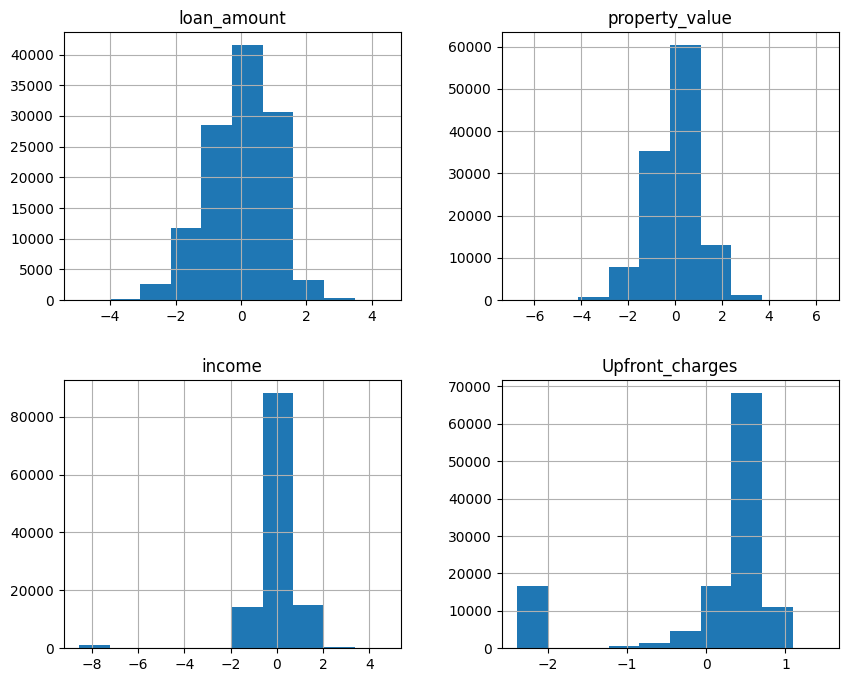

In [21]:
# Histogram plot of the Log Features

fig, ax = plt.subplots(figsize = (10, 8))
df_log.hist(ax=ax)
plt.show()

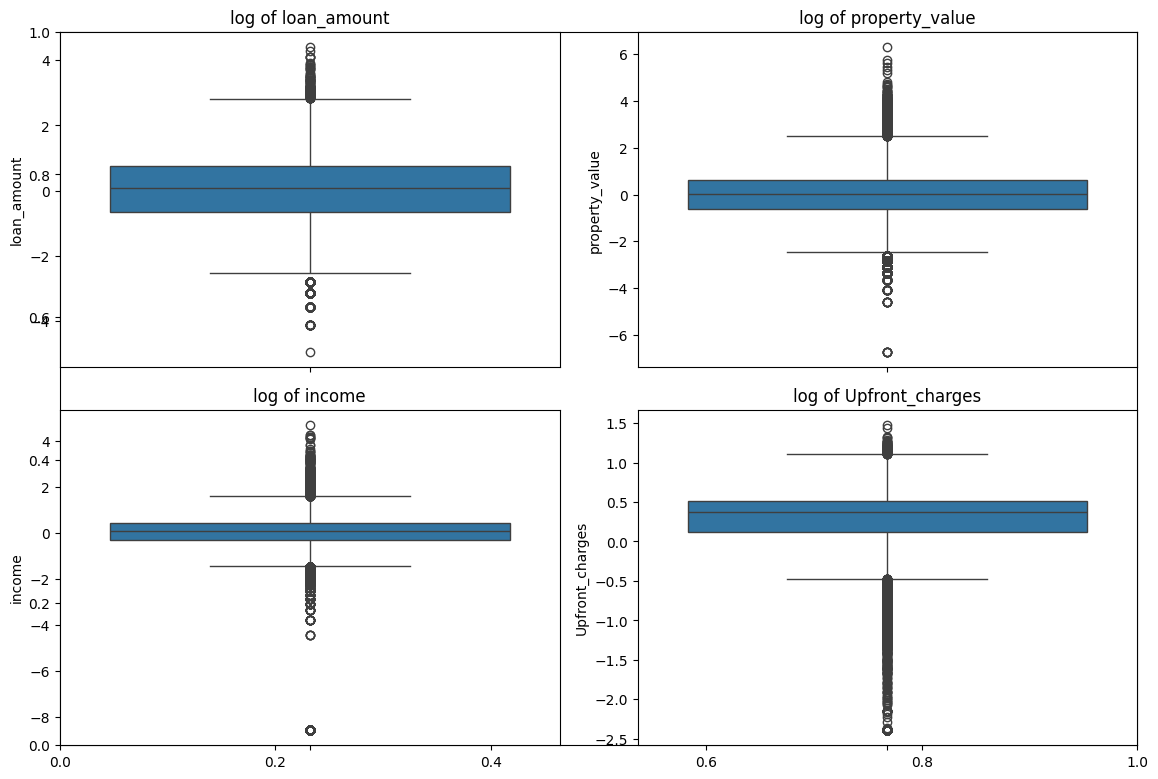

In [22]:
# Boxplot of the Log Features

fig, ax = plt.subplots(figsize = (12, 8))

for i, cols in enumerate(log_transform_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[cols])
    plt.title(f'log of {cols}')

plt.tight_layout()
plt.show()
    


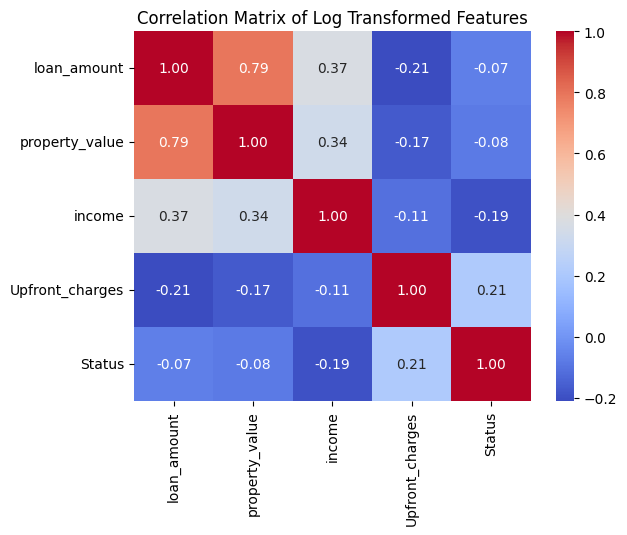

In [23]:
# ------- MULTIVARIANT ANALYSIS --------

# Include Target 
log_transform_cols = [
    'loan_amount',
    'property_value',
    'income',
    'Upfront_charges',
    'Status'
]

# correlatiom matrix
corr = df[log_transform_cols].corr()

# heatmap of log transformed features
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Matrix of Log Transformed Features')
plt.show()

### Summary of EDA on Log Transformed Features

- After transformation, none of these four features appear to be individually strong predictors of the Status variable.
- The distribution of Log(Upfront_charges) is problematic
- There is a strong multicollinearity between `property_value` and `loan_amount`. since; `Loan to property_value (LTV)` already exist, it is best to drop `property value`

## Other Numerical Columns Analysis

In [24]:
# numerical columns for analysis
numerical_cols = [
    'rate_of_interest',
    'Interest_rate_spread',
    'term',
    'Credit_Score',
    'LTV',
    'dtir1',
    'age_numerical'
]



In [25]:
# get transformed dataframe
df = get_transformed_df()

df.head()

,loan_amount,property_value,income,Upfront_charges,rate_of_interest,Interest_rate_spread,term,Credit_Score,LTV,dtir1,...,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct,Status
141245,-2.286107,-2.289657,-0.767228,0.377582,-1.089765,-0.838457,0.425386,-0.818669,-0.109128,-2.684156,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3507,1.168972,1.388673,0.305514,0.373630,-0.066885,-0.680613,0.425386,0.250870,-0.715008,0.524081,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
53688,-1.410402,-1.750828,-0.925248,0.442474,-0.834045,2.380745,-2.658811,-0.784168,0.707193,0.420590,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
46491,-0.248852,-0.612310,0.437874,0.373630,-0.087342,-0.087130,0.425386,-0.861796,0.713734,0.317098,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
54671,0.934909,1.193685,0.521759,0.262195,0.188835,-1.107733,0.425386,0.009361,-0.782570,-0.303851,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [26]:
df_num = df[numerical_cols]

df_num.head()

,rate_of_interest,Interest_rate_spread,term,Credit_Score,LTV,dtir1,age_numerical
141245,-1.089765,-0.838457,0.425386,-0.818669,-0.109128,-2.684156,1.767564
3507,-0.066885,-0.680613,0.425386,0.250870,-0.715008,0.524081,-0.084553
53688,-0.834045,2.380745,-2.658811,-0.784168,0.707193,0.420590,1.368088
46491,-0.087342,-0.087130,0.425386,-0.861796,0.713734,0.317098,-0.084553
54671,0.188835,-1.107733,0.425386,0.009361,-0.782570,-0.303851,0.641767


In [27]:
# ------- INFORMATION SUMMARY -------

df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118936 entries, 141245 to 121958
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rate_of_interest      118936 non-null  float64
 1   Interest_rate_spread  118936 non-null  float64
 2   term                  118936 non-null  float64
 3   Credit_Score          118936 non-null  float64
 4   LTV                   118936 non-null  float64
 5   dtir1                 118936 non-null  float64
 6   age_numerical         118936 non-null  float64
dtypes: float64(7)
memory usage: 7.3 MB


In [28]:
# -------- MISSING VALUES ANALYSIS -----------

# Calculate the missing Values
missing_value = df_num.isnull().sum()

missing_value[missing_value > 0]

Series([], dtype: int64)

In [29]:
#  ------- STATISTICAL SUMMARY --------
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_of_interest,118936.0,-7.305801e-16,1.000004,-8.249927,-0.578325,-0.087342,0.444555,8.116157
Interest_rate_spread,118936.0,8.038233e-17,1.000004,-9.118744,-0.553487,-0.087130,0.427879,6.564722
term,118936.0,-4.571428e-16,1.000004,-4.098103,0.425386,0.425386,0.425386,0.425386
Credit_Score,118936.0,3.718317e-16,1.000004,-1.724327,-0.870421,-0.007890,0.863267,1.725799
LTV,118936.0,4.971099e-16,1.000004,-4.004918,-0.530970,0.130785,0.667621,4.305284
dtir1,118936.0,-2.561720e-16,1.000004,-3.408597,-0.510834,0.110115,0.627573,2.386929
age_numerical,118936.0,-1.105220e-17,1.000004,-2.227199,-0.810874,-0.084553,0.641767,1.767564


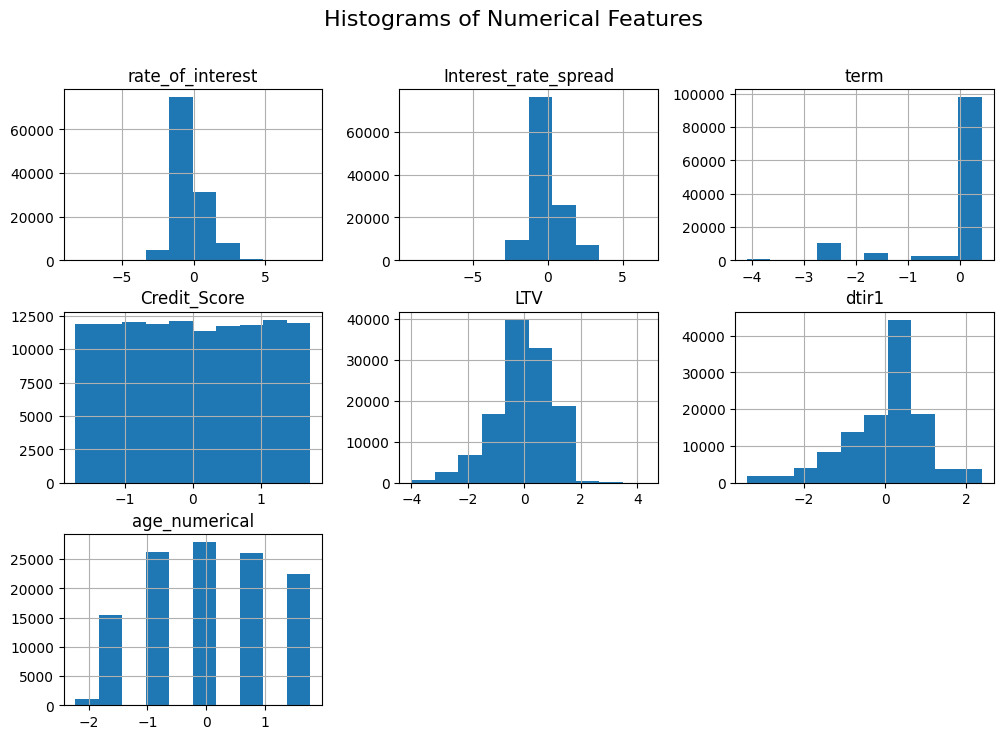

In [30]:
# ------ UNIVARIANT ANALYSIS -------

df_num.hist(figsize=(12,8))
plt.suptitle('Histograms of Numerical Features', fontsize=16)

plt.show()

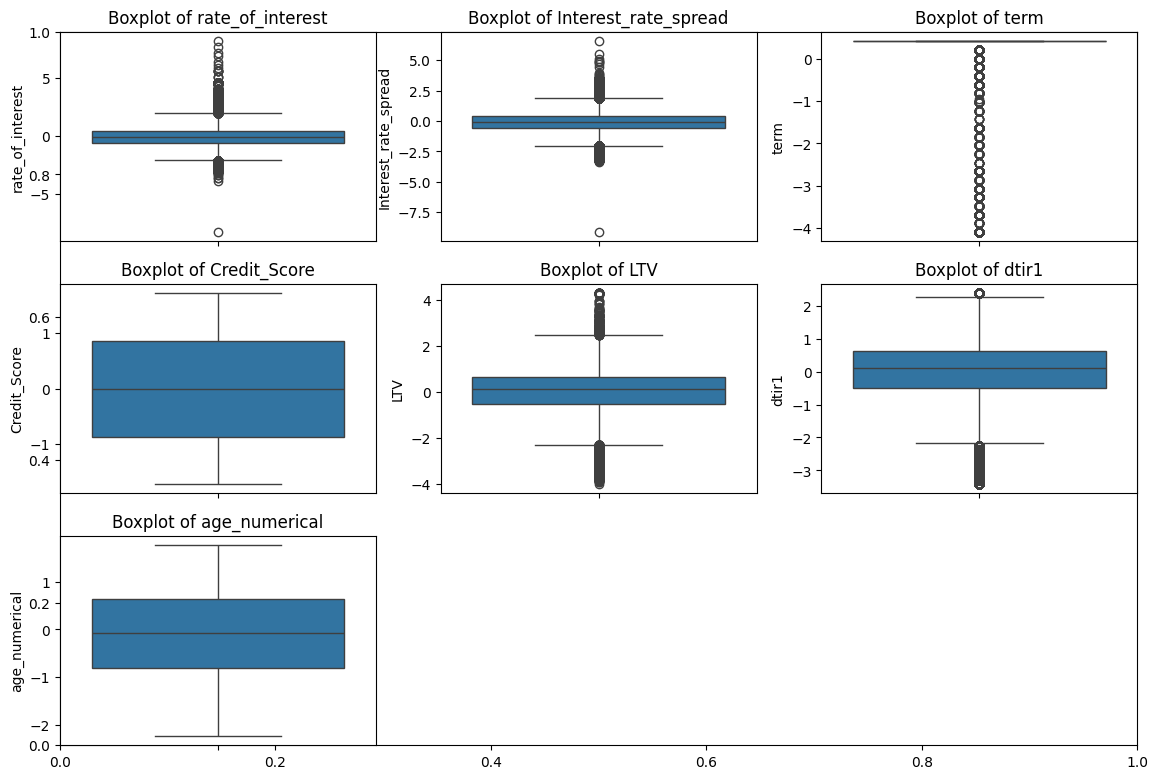

In [31]:
# ------- Boxplots of Numerical Features -------

fig, ax = plt.subplots(figsize=(12, 8))
for i, cols in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df_num[cols])
    plt.title(f'Boxplot of {cols}')

plt.tight_layout()
plt.show()

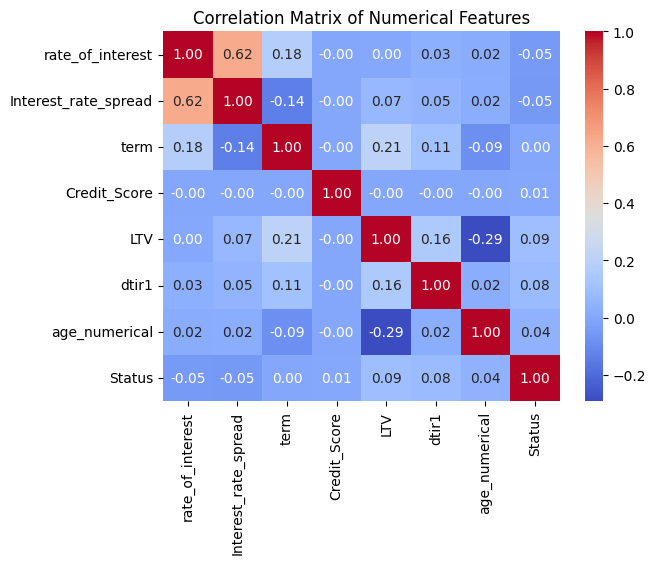

In [32]:
# ---------- MULTIVARIANT ANALYSIS --------

# Include Target 
numerical_cols = [
    'rate_of_interest',
    'Interest_rate_spread',
    'term',
    'Credit_Score',
    'LTV',
    'dtir1',
    'age_numerical',
    'Status'
]   

# correlatiom matrix
corr = df[numerical_cols].corr()

# heatmap of log transformed features
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm',
    fmt='.2f'
)

plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Summary EDA

- There is extreme skewness in `Term`. Might have to convert to Categorical features.
- Likewise, other features such as `rate_of_interest, Interest_rate_spread, dtir1` still posses outliers. Log transformation may be appropriate for them.
- `rate of interest` and `interest_rate_spread` are collinear. May **drop** the `rate_of_interets` feature.
- `age_numerical` has a weak colinearity relationship with `LTV`. Indicating the Older people tends to have more properties or Equity than the younger folks.

In [33]:
# ---------- COMPLETE NUMERICAL COLS ANALYSIS --------------

# Numerical Features
num_feat = log_transform_cols + numerical_cols

num_feat

['loan_amount',
 'property_value',
 'income',
 'Upfront_charges',
 'Status',
 'rate_of_interest',
 'Interest_rate_spread',
 'term',
 'Credit_Score',
 'LTV',
 'dtir1',
 'age_numerical',
 'Status']

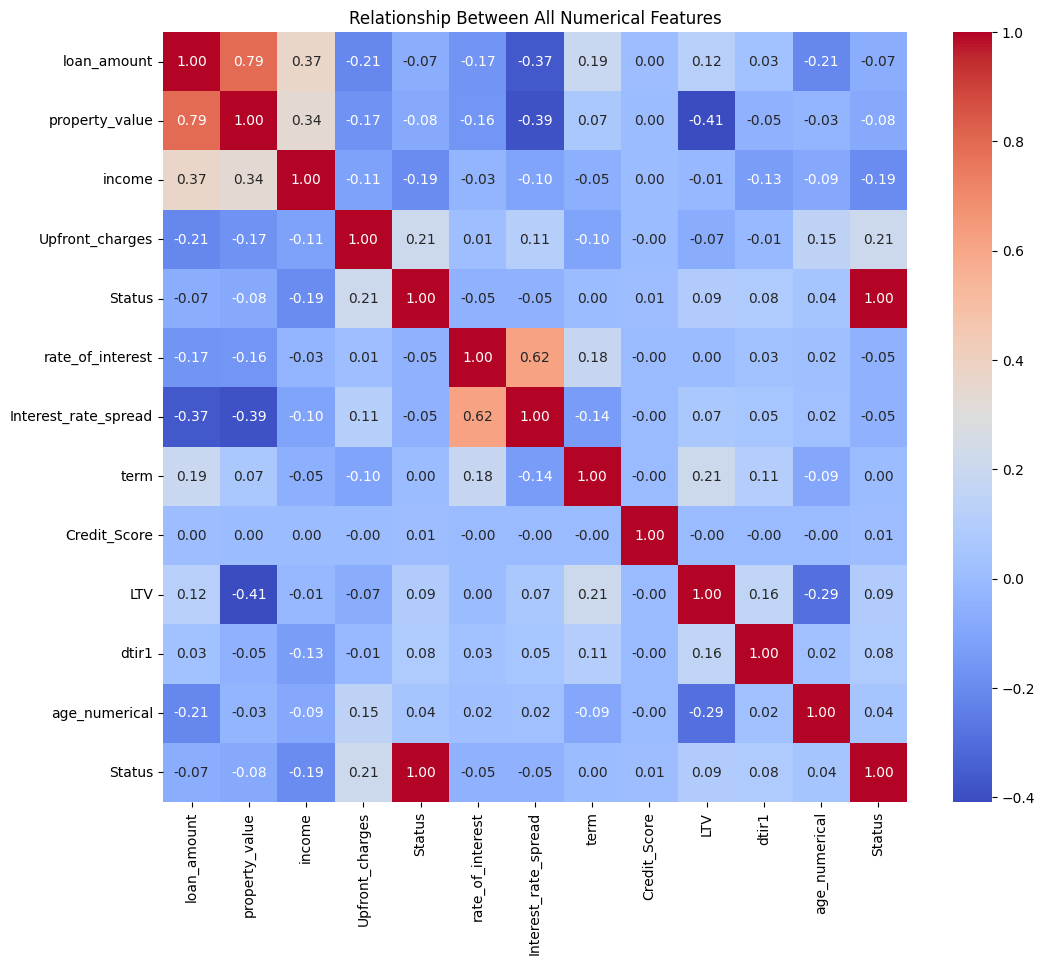

In [34]:
# Complete Numeric Feature dataframe correlation matrix
corr = df[num_feat].corr()

# plot heat map
fig = plt.figure(figsize = (12, 10))

sns.heatmap(
    corr,
    annot= True,
    fmt='.2f',
    cmap= 'coolwarm'
)

plt.title("Relationship Between All Numerical Features")
plt.show()

## EDA ON TRANSFORMED CATEGORICAL FEATURES ---

In [35]:
# numerical feature names
num_cols = [
    'loan_amount',
    'property_value',
    'income',
    'Upfront_charges',
    'rate_of_interest',
    'Interest_rate_spread',
    'term',
    'Credit_Score',
    'LTV',
    'dtir1',
    'age_numerical'
]

df = get_transformed_df()

df.head()

,loan_amount,property_value,income,Upfront_charges,rate_of_interest,Interest_rate_spread,term,Credit_Score,LTV,dtir1,...,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct,Status
141245,-2.286107,-2.289657,-0.767228,0.377582,-1.089765,-0.838457,0.425386,-0.818669,-0.109128,-2.684156,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3507,1.168972,1.388673,0.305514,0.373630,-0.066885,-0.680613,0.425386,0.250870,-0.715008,0.524081,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
53688,-1.410402,-1.750828,-0.925248,0.442474,-0.834045,2.380745,-2.658811,-0.784168,0.707193,0.420590,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
46491,-0.248852,-0.612310,0.437874,0.373630,-0.087342,-0.087130,0.425386,-0.861796,0.713734,0.317098,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
54671,0.934909,1.193685,0.521759,0.262195,0.188835,-1.107733,0.425386,0.009361,-0.782570,-0.303851,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [36]:
# Filter transformed categorical features alone
df_cat = df.drop(columns = num_cols)

df_cat.head()

,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,...,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct,Status
141245,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3507,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
53688,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
46491,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
54671,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [37]:
# ---------- SUMMARY INFORMATION -----------
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118936 entries, 141245 to 121958
Data columns (total 53 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   loan_limit_cf                       118936 non-null  float64
 1   loan_limit_ncf                      118936 non-null  float64
 2   Gender_Female                       118936 non-null  float64
 3   Gender_Joint                        118936 non-null  float64
 4   Gender_Male                         118936 non-null  float64
 5   Gender_Sex Not Available            118936 non-null  float64
 6   approv_in_adv_nopre                 118936 non-null  float64
 7   approv_in_adv_pre                   118936 non-null  float64
 8   loan_type_type1                     118936 non-null  float64
 9   loan_type_type2                     118936 non-null  float64
 10  loan_type_type3                     118936 non-null  float64
 11  loan_purpose_p1           

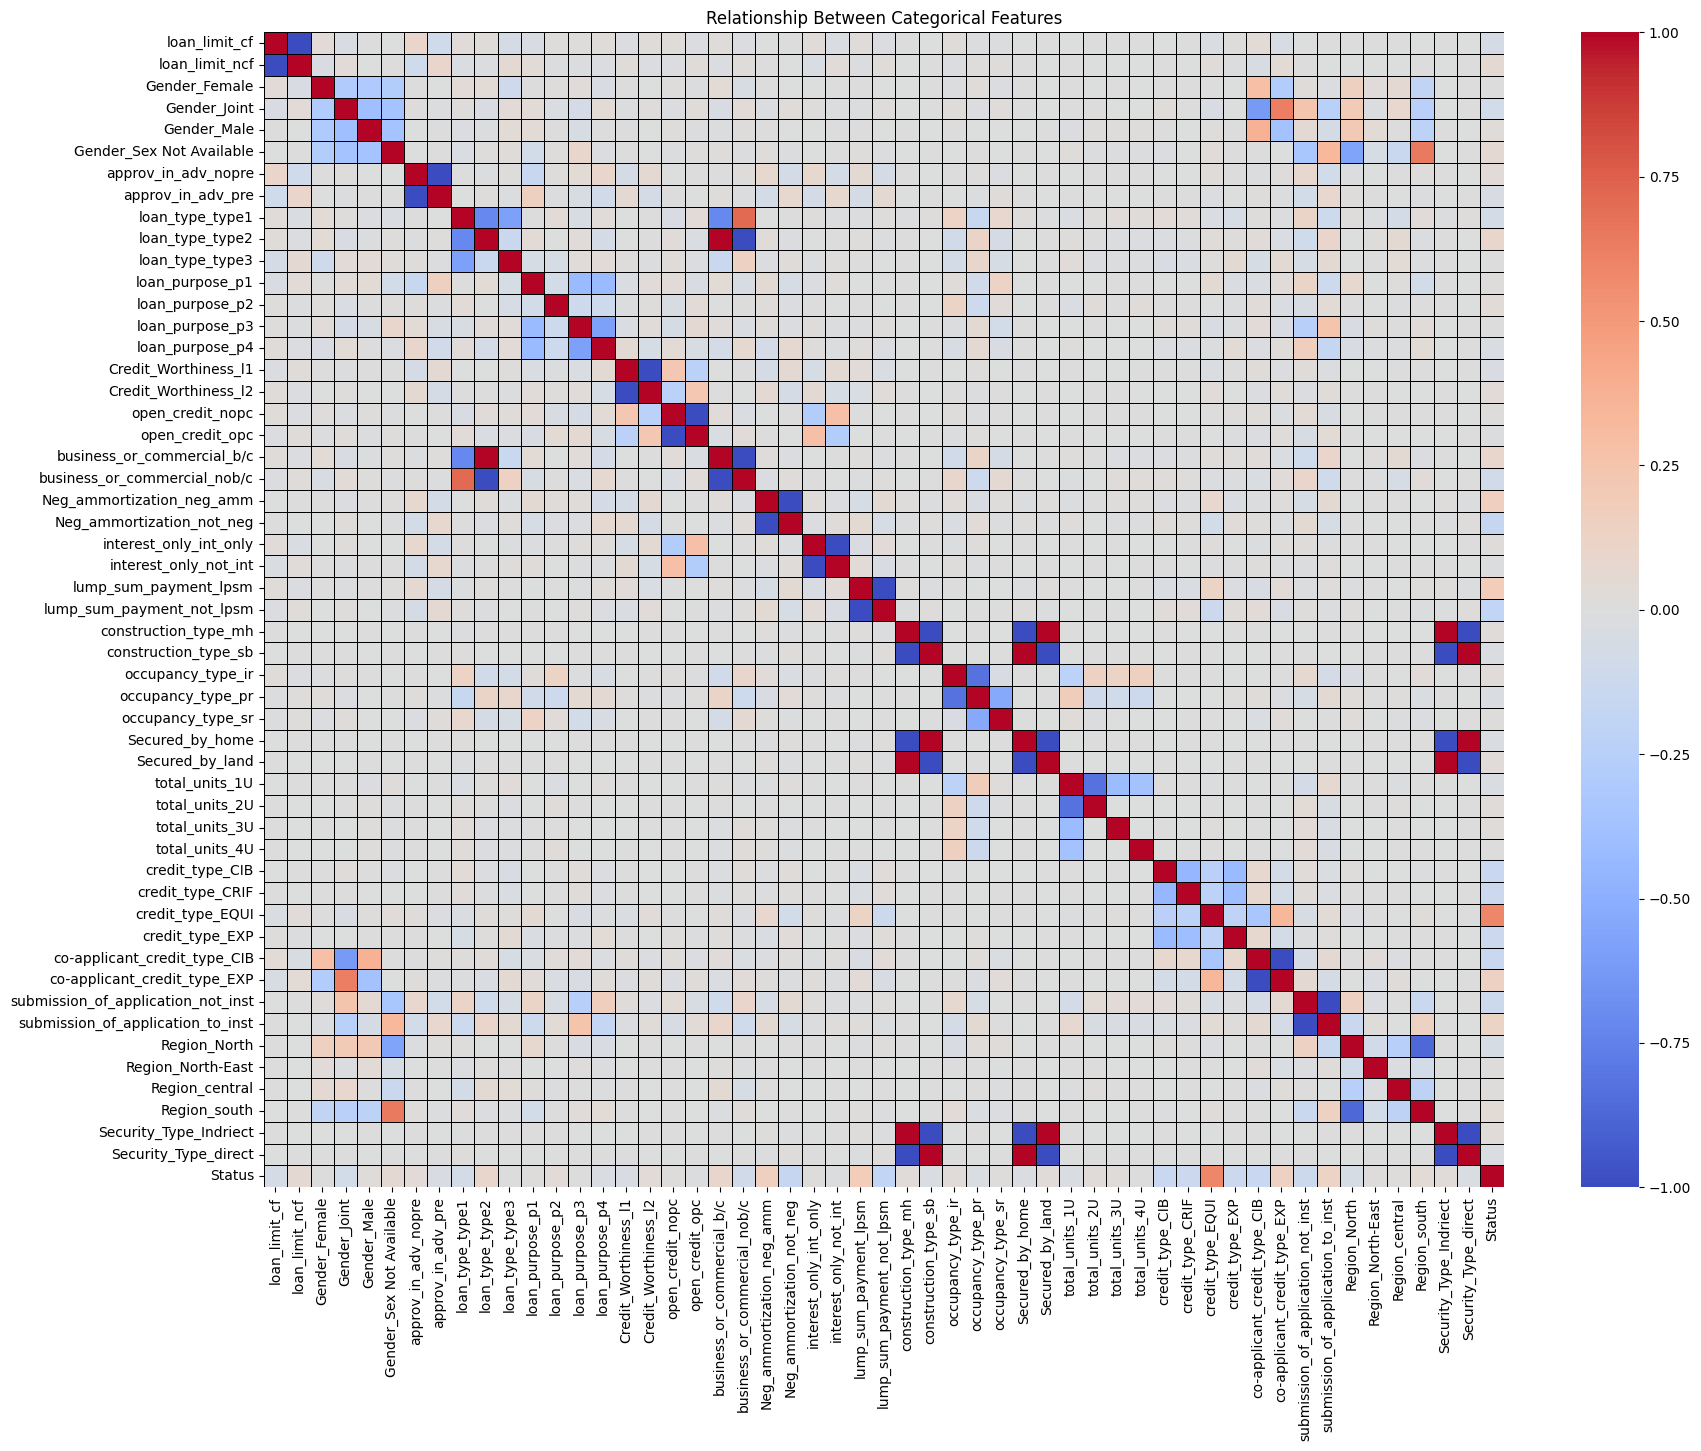

In [38]:
# -------- MULTIVARIANT ANALYSIS ----------

# correlation matrix
corr = df_cat.corr()

fig = plt.figure(figsize=(20, 15))

# heatmap
sns.heatmap(
    corr,
    cmap= 'coolwarm',
    linewidths=0.5,
    linecolor='black',
)

plt.title("Relationship Between Categorical Features")
plt.show()

Text(0.5, 0, 'Correlation')

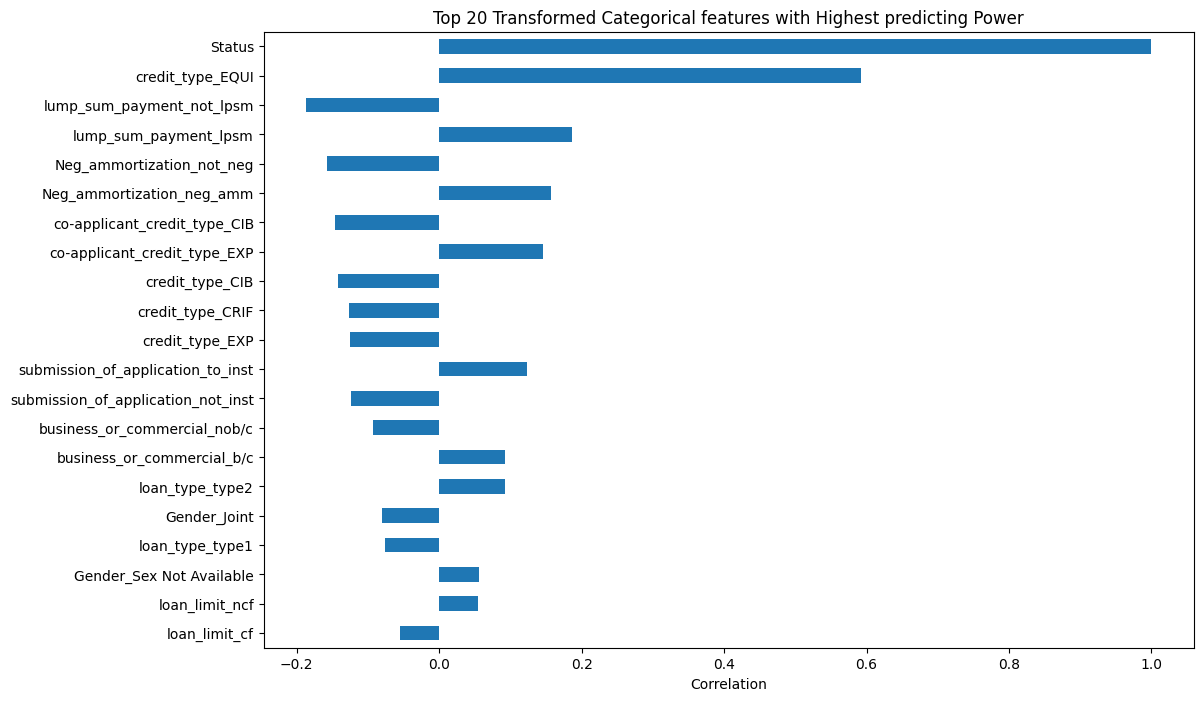

In [39]:
# ------ Correlation Bar ------------

# correlation with Target feature (top 20)
corr_bar = corr['Status'].sort_values(key=np.abs, ascending=True).tail(21)

corr_bar.plot(kind='barh', figsize=(12, 8))
plt.title('Top 20 Transformed Categorical features with Highest predicting Power')
plt.xlabel('Correlation')

In [40]:
df_cat.corr()

,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,...,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct,Status
loan_limit_cf,1.000000,-1.000000,0.032230,-0.032197,0.006713,-0.002520,0.099921,-0.099921,0.024487,0.022874,...,-0.040460,-0.005700,0.005700,0.004658,0.007052,0.000063,-0.006033,0.003893,-0.003893,-0.054813
loan_limit_ncf,-1.000000,1.000000,-0.032230,0.032197,-0.006713,0.002520,-0.099921,0.099921,-0.024487,-0.022874,...,0.040460,0.005700,-0.005700,-0.004658,-0.007052,-0.000063,0.006033,-0.003893,0.003893,0.054813
Gender_Female,0.032230,-0.032230,1.000000,-0.295192,-0.299416,-0.276960,0.002299,-0.002299,0.041487,0.041037,...,-0.286756,0.020270,-0.020270,0.151941,0.030134,0.061407,-0.188049,-0.000911,0.000911,0.004989
Gender_Joint,-0.032197,0.032197,-0.295192,1.000000,-0.391055,-0.361726,0.010673,-0.010673,0.009451,-0.038720,...,0.620058,0.246586,-0.246586,0.201564,-0.022404,0.080818,-0.237664,-0.003826,0.003826,-0.080224
Gender_Male,0.006713,-0.006713,-0.299416,-0.391055,1.000000,-0.366902,-0.007068,0.007068,-0.021047,-0.010348,...,-0.368916,0.061322,-0.061322,0.214860,0.045209,0.002036,-0.226228,0.006302,-0.006302,0.021942
Gender_Sex Not Available,-0.002520,0.002520,-0.276960,-0.361726,-0.366902,1.000000,-0.005719,0.005719,-0.024904,0.014036,...,-0.000736,-0.335711,0.335711,-0.565894,-0.050652,-0.140126,0.647064,-0.001780,0.001780,0.055461
approv_in_adv_nopre,0.099921,-0.099921,0.002299,0.010673,-0.007068,-0.005719,1.000000,-1.000000,0.003418,-0.013531,...,0.012531,0.078953,-0.078953,-0.009412,-0.002662,0.000622,0.009699,0.001427,-0.001427,0.035474
approv_in_adv_pre,-0.099921,0.099921,-0.002299,-0.010673,0.007068,0.005719,-1.000000,1.000000,-0.003418,0.013531,...,-0.012531,-0.078953,0.078953,0.009412,0.002662,-0.000622,-0.009699,-0.001427,0.001427,-0.035474
loan_type_type1,0.024487,-0.024487,0.041487,0.009451,-0.021047,-0.024904,0.003418,-0.003418,1.000000,-0.718666,...,-0.014251,0.111473,-0.111473,0.009784,-0.016387,-0.071467,0.026996,-0.008261,0.008261,-0.075411
loan_type_type2,0.022874,-0.022874,0.041037,-0.038720,-0.010348,0.014036,-0.013531,0.013531,-0.718666,1.000000,...,-0.023673,-0.094423,0.094423,-0.005611,0.014807,0.053254,-0.022291,0.007612,-0.007612,0.092181
